In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=sns.load_dataset('exercise')

In [5]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [8]:
df['kind'].unique()

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

<AxesSubplot:xlabel='pulse', ylabel='Count'>

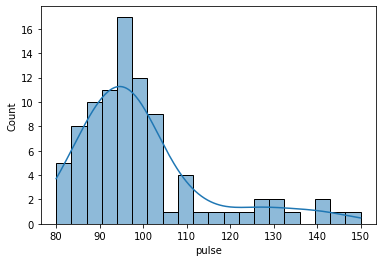

In [43]:
sns.histplot(df['pulse'],bins=20,kde=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [47]:
list1=[]
for i in range(0,90):
    x=int(df['time'][i].split()[0])
    list1.append(x)

In [51]:
df['list1']=list1

In [54]:
df.drop('time',axis=1)

,Unnamed: 0,id,diet,pulse,kind,list1
0,0,1,low fat,85,rest,1
1,1,1,low fat,85,rest,15
2,2,1,low fat,88,rest,30
3,3,2,low fat,90,rest,1
4,4,2,low fat,92,rest,15
...,...,...,...,...,...,...
85,85,29,no fat,135,running,15
86,86,29,no fat,130,running,30
87,87,30,no fat,99,running,1
88,88,30,no fat,111,running,15


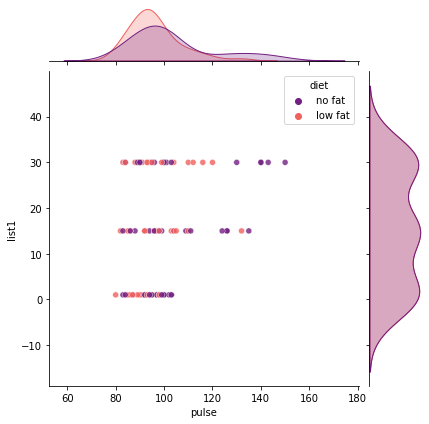

In [72]:
sns.jointplot(x='pulse',y='list1',data=df,kind='scatter',palette='magma',hue='diet',alpha=0.8)

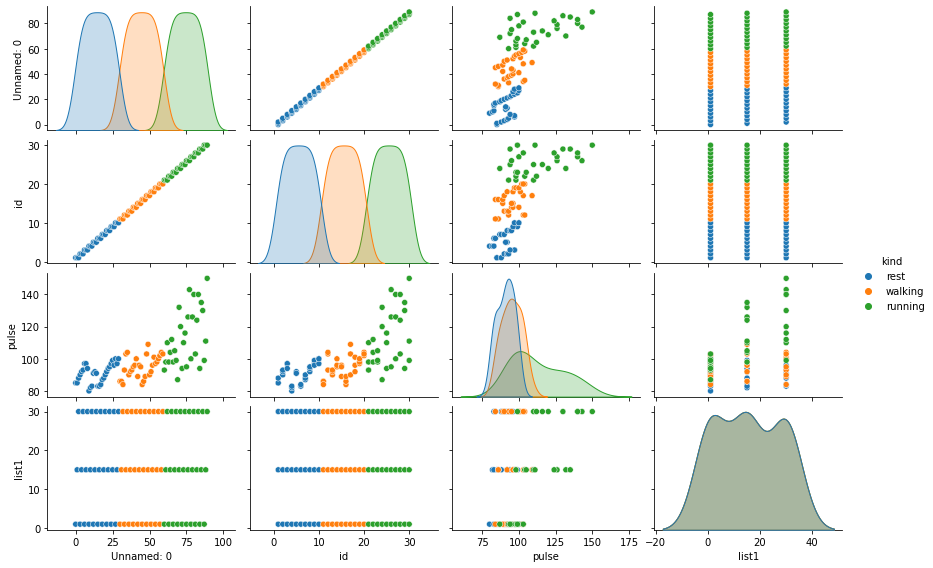

In [82]:
sns.pairplot(df,hue='kind',aspect=1.5,height=2)

<AxesSubplot:xlabel='pulse', ylabel='time'>

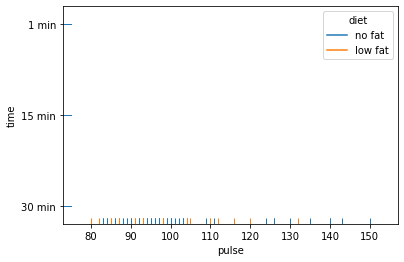

In [86]:
sns.rugplot(x='pulse',y='time',data=df,hue='diet')

<AxesSubplot:xlabel='kind', ylabel='pulse'>

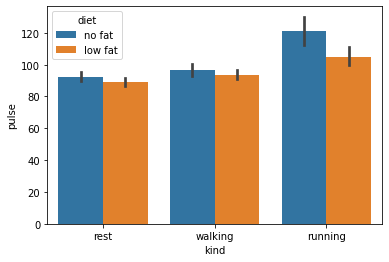

In [90]:
sns.barplot(x='kind',y='pulse',data=df,hue='diet')

C:\Users\Harmeet Singh\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diet', ylabel='count'>

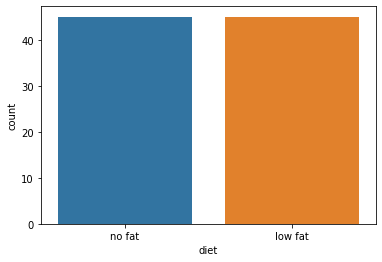

In [92]:
sns.countplot(df['diet'])

<AxesSubplot:xlabel='kind', ylabel='pulse'>

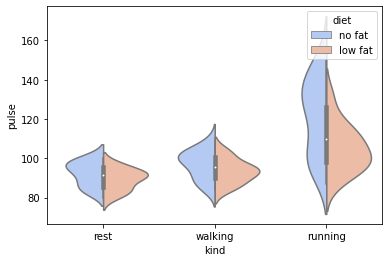

In [96]:
sns.violinplot(x='kind',y='pulse',data=df,hue='diet',split=True,palette='coolwarm')

C:\Users\Harmeet Singh\anaconda\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='kind', ylabel='pulse'>

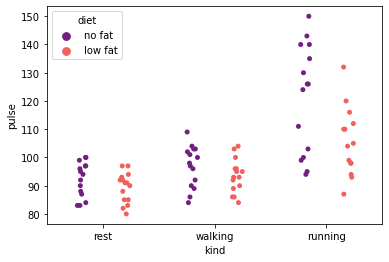

In [101]:
sns.stripplot(x='kind',y='pulse',data=df,hue='diet',split=True,palette='magma',jitter=True)

C:\Users\Harmeet Singh\anaconda\lib\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='kind', ylabel='pulse'>

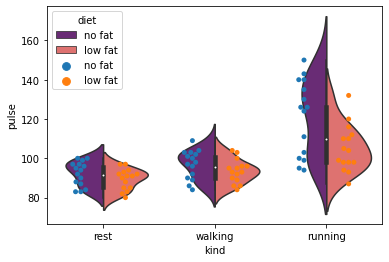

In [108]:
sns.violinplot(x='kind',y='pulse',data=df,hue='diet',split=True,palette='magma')
sns.swarmplot(x='kind',y='pulse',data=df,hue='diet',split=True,c='b')

<AxesSubplot:>

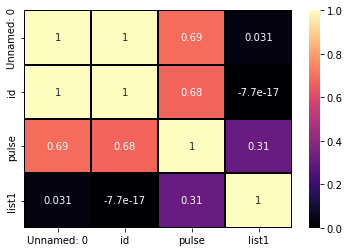

In [115]:
sns.heatmap(df.corr(),cmap='magma',annot=True,lw=2,linecolor='black')

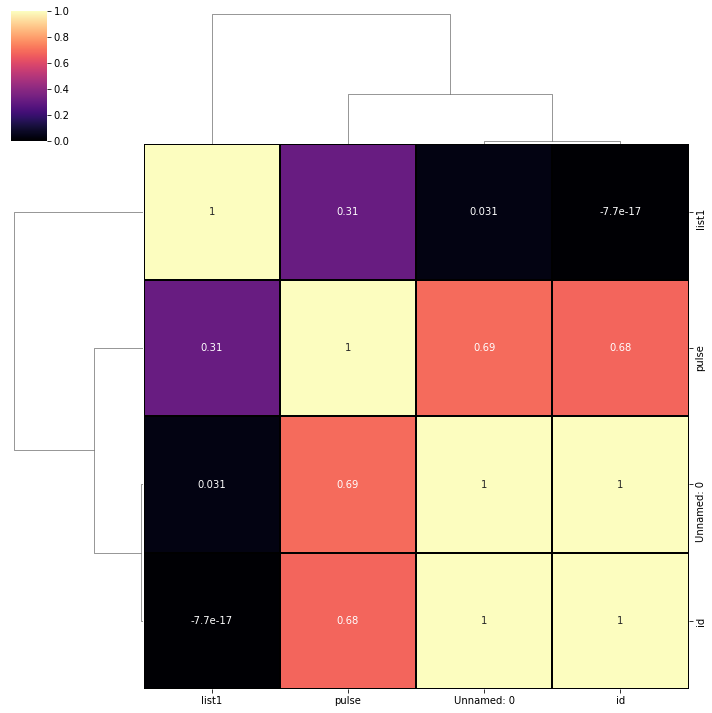

In [116]:
sns.clustermap(df.corr(),cmap='magma',annot=True,lw=2,linecolor='black')

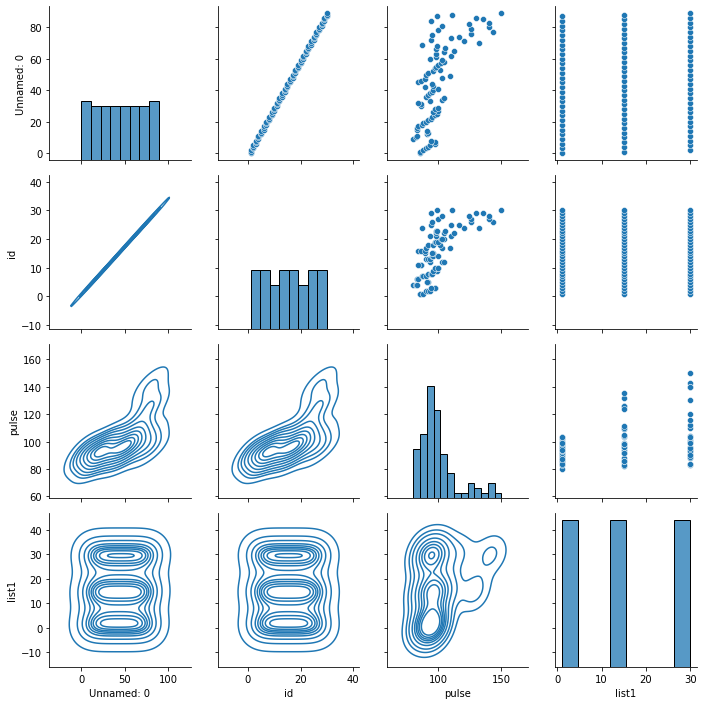

In [118]:
df2=sns.PairGrid(df)
df2.map_diag(sns.histplot)
df2.map_upper(sns.scatterplot)
df2.map_lower(sns.kdeplot)

In [121]:
list2=[]
for i in range(0,90):
    if i<30:
        list2.append("hlo")
    else:
        list2.append('bye')
df['list2']=list2

In [122]:
df

,Unnamed: 0,id,diet,pulse,time,kind,list1,list2
0,0,1,low fat,85,1 min,rest,1,hlo
1,1,1,low fat,85,15 min,rest,15,hlo
2,2,1,low fat,88,30 min,rest,30,hlo
3,3,2,low fat,90,1 min,rest,1,hlo
4,4,2,low fat,92,15 min,rest,15,hlo
...,...,...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running,15,bye
86,86,29,no fat,130,30 min,running,30,bye
87,87,30,no fat,99,1 min,running,1,bye
88,88,30,no fat,111,15 min,running,15,bye


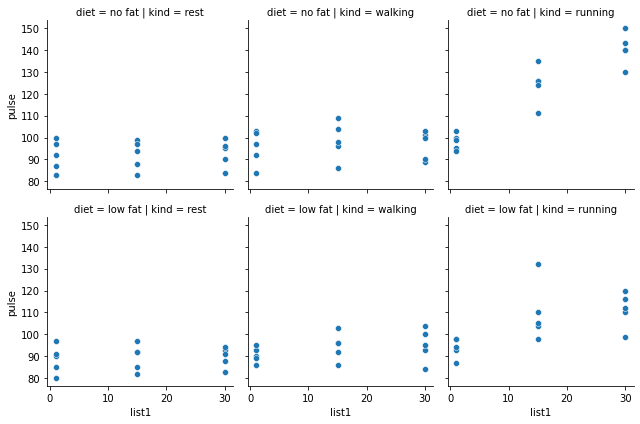

In [128]:
df3=sns.FacetGrid(row='diet',col='kind',data=df)
df3.map(sns.scatterplot,'list1','pulse')

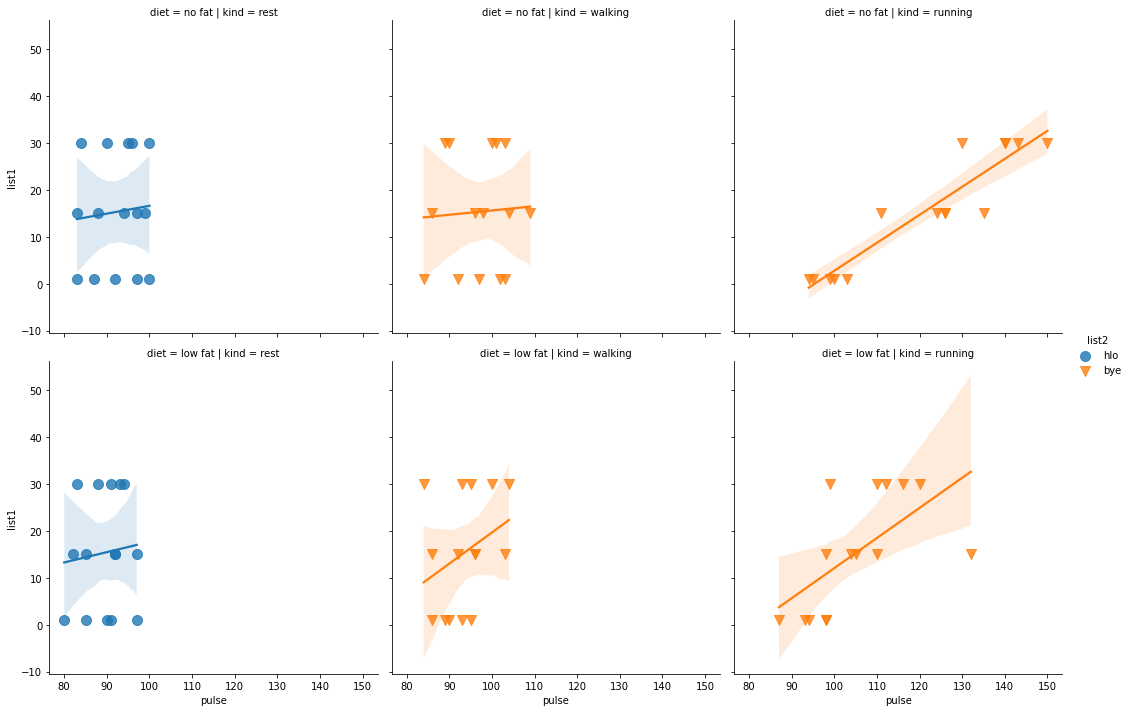

In [141]:
sns.lmplot(x='pulse',y='list1',data=df,row='diet',col='kind',hue="list2",markers=['o','v'], scatter_kws={'s':100})